In [1]:
#Importing libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

In [2]:
#LOADING DATASET
train = pd.read_csv("C:\\Users\\bhimr\\Downloads\\Logistic Regression (1)\\Logistic Regression\\Titanic_train.csv")
test = pd.read_csv("C:\\Users\\bhimr\\Downloads\\Logistic Regression (1)\\Logistic Regression\\Titanic_test.csv")


In [3]:
#Combining the dataset fort analysis of the dataset
titanic = pd.concat([train,test],ignore_index = True)

In [4]:
#Displaying the first 5 rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [6]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
titanic.shape

(1309, 12)

In [8]:
#PassengerId,Name,Ticket,Cabin these are the columns which are not significant for the survival rate,so dropping them.
titanic = titanic.drop(['PassengerId'],axis = 1)

In [9]:
titanic = titanic.drop(['Name'],axis = 1)


In [10]:
titanic = titanic.drop(['Ticket'],axis = 1)

In [11]:
titanic = titanic.drop(['Cabin'],axis = 1)

In [12]:
titanic.head()#new dataset with PassengerId,Name,Ticket,Cabin columns dropped

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [13]:
titanic['Sex'] = titanic['Sex'].map({'male':1,'female':0})#coverting sex to numerical types

In [14]:
titanic['Embarked'] = titanic['Embarked'].map({'S':1,'C':2,'Q':3})#converting embarked to numerical types

In [15]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,1.0
1,1.0,1,0,38.0,1,0,71.2833,2.0
2,1.0,3,0,26.0,0,0,7.9250,1.0
3,1.0,1,0,35.0,1,0,53.1000,1.0
4,0.0,3,1,35.0,0,0,8.0500,1.0


In [16]:
titanic.dtypes

Survived    float64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

In [17]:
titanic.isnull().sum()#Detecting total number of null values in each column

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [18]:
# For loop for each column -to replace the null values with its mean value of the column
# MEAN IMPUTATION
columns_to = ['Survived','Age','Fare','Embarked']
for column in columns_to:
    if column in titanic.columns:
        titanic[column].fillna(titanic[column].mean(),inplace = True)

C:\Users\bhimr\AppData\Local\Temp\ipykernel_4896\2968292945.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic[column].fillna(titanic[column].mean(),inplace = True)


In [19]:
titanic.isnull().sum()# No null values after Mean imputation

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
titanic[titanic.duplicated()].shape #Detecting the duplicates

(149, 8)

In [21]:
titanic = titanic.drop_duplicates()#Dropping duplicates

In [22]:
titanic[titanic.duplicated()].shape

(0, 8)

In [23]:
#Converting the columns to intege. Except Price
columns_to_convert = ['Survived', 'Fare', 'Age', 'Embarked','Sex','SibSp','Parch']

for column in columns_to_convert:
    titanic[column] = titanic[column].astype(int)

# Display the first few rows to verify
print(titanic.head())


   Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0         0       3    1   22      1      0     7         1
1         1       1    0   38      1      0    71         2
2         1       3    0   26      0      0     7         1
3         1       1    0   35      1      0    53         1
4         0       3    1   35      0      0     8         1


In [24]:
titanic.dtypes

Survived    int32
Pclass      int64
Sex         int32
Age         int32
SibSp       int32
Parch       int32
Fare        int32
Embarked    int32
dtype: object

In [25]:
titanic.describe() #Descriptive statistics

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,0.277586,2.237069,0.624138,29.820690,0.512069,0.422414,35.488793,1.374138
std,0.448001,0.853256,0.484554,13.564237,0.967920,0.902024,54.196092,0.625614
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000,8.000000,1.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,15.000000,1.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,34.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.000000,3.000000


In [26]:
#Detecting Outliers
# Select only numerical columns
numerical_columns = titanic.columns

outliers = {}

for column in numerical_columns:
    Q1 = titanic[column].quantile(0.25)
    Q3 = titanic[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outlier_values = titanic[(titanic[column] < lower_bound) | (titanic[column] > upper_bound)][column]
    outliers[column] = outlier_values.tolist()

# Display outliers
for col, values in outliers.items():
    if values:
        print(f"Outliers in column {col}: {values}")


Outliers in column Age: [58, 66, 65, 0, 59, 71, 70, 61, 58, 59, 62, 58, 63, 65, 0, 61, 60, 64, 65, 0, 63, 58, 71, 64, 62, 60, 61, 80, 58, 70, 60, 60, 70, 0, 0, 62, 0, 74, 62, 63, 60, 60, 67, 76, 63, 61, 60, 64, 61, 0, 60, 64, 0, 0, 64, 0, 58, 0, 59]
Outliers in column SibSp: [3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 3, 4, 4, 4, 4, 3, 3, 5, 5, 4, 4, 3, 3, 5, 4, 3, 4, 4, 3, 4, 4, 3, 4, 5, 3, 4, 8, 4, 8, 4, 3, 3]
Outliers in column Parch: [5, 5, 3, 4, 4, 3, 4, 4, 5, 5, 6, 3, 3, 3, 5, 3, 4, 4, 6, 3, 5, 3, 9, 9]
Outliers in column Fare: [263, 146, 82, 76, 80, 83, 263, 77, 247, 77, 79, 146, 113, 76, 90, 83, 90, 79, 86, 512, 79, 153, 135, 77, 78, 91, 151, 247, 151, 110, 108, 83, 262, 164, 134, 135, 153, 133, 134, 263, 75, 135, 82, 211, 227, 120, 113, 90, 120, 263, 81, 89, 91, 90, 78, 151, 86, 108, 93, 221, 106, 106, 110, 227, 79, 110, 79, 79, 78, 153, 77, 76, 113, 133, 512, 76, 211, 110, 227, 151, 227, 211, 512, 78, 262, 86, 120, 77, 211, 79, 120, 93, 80, 83, 89, 164, 83, 82, 262

In [27]:
#Replacing the outliers with nearest value of the column.
columns_to_check = titanic.columns  # Replace with specific column names if needed

for column in columns_to_check:
    Q1 = titanic[column].quantile(0.25)
    Q3 = titanic[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with nearest acceptable value using .loc[]
    titanic.loc[titanic[column] < lower_bound, column] = lower_bound
    titanic.loc[titanic[column] > upper_bound, column] = upper_bound

C:\Users\bhimr\AppData\Local\Temp\ipykernel_4896\2828124196.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  titanic.loc[titanic[column] < lower_bound, column] = lower_bound
C:\Users\bhimr\AppData\Local\Temp\ipykernel_4896\2828124196.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  titanic.loc[titanic[column] < lower_bound, column] = lower_bound
C:\Users\bhimr\AppData\Local\Temp\ipykernel_4896\2828124196.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.

In [28]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,0.277586,2.237069,0.624138,29.568103,0.443966,0.381034,26.313793,1.374138
std,0.448001,0.853256,0.484554,12.900650,0.691285,0.707157,23.044126,0.625614
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000,8.000000,1.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,15.000000,1.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,34.000000,2.000000
max,1.000000,3.000000,1.000000,57.000000,2.500000,2.500000,73.000000,3.000000


In [29]:
outlier_values = titanic[(titanic[column] < lower_bound) | (titanic[column] > upper_bound)][column]
outliers[column] = outlier_values.tolist()

# Display outliers
for col, values in outliers.items():
    if values:
        print(f"Outliers in column {col}: {values}")


Outliers in column Age: [58, 66, 65, 0, 59, 71, 70, 61, 58, 59, 62, 58, 63, 65, 0, 61, 60, 64, 65, 0, 63, 58, 71, 64, 62, 60, 61, 80, 58, 70, 60, 60, 70, 0, 0, 62, 0, 74, 62, 63, 60, 60, 67, 76, 63, 61, 60, 64, 61, 0, 60, 64, 0, 0, 64, 0, 58, 0, 59]
Outliers in column SibSp: [3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 3, 4, 4, 4, 4, 3, 3, 5, 5, 4, 4, 3, 3, 5, 4, 3, 4, 4, 3, 4, 4, 3, 4, 5, 3, 4, 8, 4, 8, 4, 3, 3]
Outliers in column Parch: [5, 5, 3, 4, 4, 3, 4, 4, 5, 5, 6, 3, 3, 3, 5, 3, 4, 4, 6, 3, 5, 3, 9, 9]
Outliers in column Fare: [263, 146, 82, 76, 80, 83, 263, 77, 247, 77, 79, 146, 113, 76, 90, 83, 90, 79, 86, 512, 79, 153, 135, 77, 78, 91, 151, 247, 151, 110, 108, 83, 262, 164, 134, 135, 153, 133, 134, 263, 75, 135, 82, 211, 227, 120, 113, 90, 120, 263, 81, 89, 91, 90, 78, 151, 86, 108, 93, 221, 106, 106, 110, 227, 79, 110, 79, 79, 78, 153, 77, 76, 113, 133, 512, 76, 211, 110, 227, 151, 227, 211, 512, 78, 262, 86, 120, 77, 211, 79, 120, 93, 80, 83, 89, 164, 83, 82, 262

In [30]:
columns_to_check = titanic.columns  # Replace with specific column names if needed

for column in columns_to_check:
    Q1 = titanic[column].quantile(0.25)
    Q3 = titanic[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with nearest acceptable value using .loc[]
    titanic.loc[titanic[column] < lower_bound, column] = lower_bound
    titanic.loc[titanic[column] > upper_bound, column] = upper_bound

In [31]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,0.277586,2.237069,0.624138,29.568103,0.443966,0.381034,26.313793,1.374138
std,0.448001,0.853256,0.484554,12.900650,0.691285,0.707157,23.044126,0.625614
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000,8.000000,1.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,15.000000,1.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,34.000000,2.000000
max,1.000000,3.000000,1.000000,57.000000,2.500000,2.500000,73.000000,3.000000


In [32]:
titanic.corr()#Correlation matrix for the dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.242272,-0.377479,-0.063138,0.015443,0.082540,0.221053,0.029330
Pclass,-0.242272,1.000000,0.111360,-0.380414,0.013764,0.012463,-0.738750,-0.001435
Sex,-0.377479,0.111360,1.000000,0.059999,-0.128614,-0.233846,-0.208800,-0.107803
Age,-0.063138,-0.380414,0.059999,1.000000,-0.203132,-0.212857,0.212125,0.035219
SibSp,0.015443,0.013764,-0.128614,-0.203132,1.000000,0.407303,0.292878,-0.053230
Parch,0.082540,0.012463,-0.233846,-0.212857,0.407303,1.000000,0.276108,-0.089457
Fare,0.221053,-0.738750,-0.208800,0.212125,0.292878,0.276108,1.000000,0.045952
Embarked,0.029330,-0.001435,-0.107803,0.035219,-0.053230,-0.089457,0.045952,1.000000


In [33]:
x = titanic.iloc[:,1:]# Storing the independent variables in x .

In [34]:
y = titanic.iloc[:,0] # Storig the dependent variable in y

In [35]:
y = y.astype(int)# Converting the 'y' to numeric

In [36]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22,1.0,0.0,7,1.0
1,1,0.0,38,1.0,0.0,71,2.0
2,3,0.0,26,0.0,0.0,7,1.0
3,1,0.0,35,1.0,0.0,53,1.0
4,3,1.0,35,0.0,0.0,8,1.0
...,...,...,...,...,...,...,...
1302,1,0.0,37,1.0,0.0,73,3.0
1303,3,0.0,28,0.0,0.0,7,1.0
1305,1,0.0,39,0.0,0.0,73,2.0
1306,3,1.0,38,0.0,0.0,7,1.0


In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)# Splitting 80% for training and 20% of the data for test
model = LogisticRegression(max_iter = 1000)# Creating a LogisticRegression model
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [38]:
y_pred = model.predict(x)# Storing the predicted value in y_pred,Prediction using predict function ,Using x variable

In [39]:
y_pred_val = pd.DataFrame({'Actual value':y,'Predicted value':y_pred})#Creating Dataframe  with actual values and predicted values

In [40]:
print(y_pred_val)

      Actual value  Predicted value
0                0                0
1                1                1
2                1                0
3                1                1
4                0                0
...            ...              ...
1302             0                1
1303             0                0
1305             0                1
1306             0                0
1308             0                0

[1160 rows x 2 columns]


In [41]:
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,roc_auc_score,roc_curve)#Importing Libraries

In [42]:
Confusion_matrix = confusion_matrix(y,y_pred)

In [43]:
print(Confusion_matrix)

[[766  72]
 [203 119]]


In [44]:
acc = (766+119)/(766+72+203+119)

In [45]:
acc * 100 #Accuracy of the model is 76%

76.29310344827587

In [46]:
Accuracy = accuracy_score(y,y_pred)
print(Accuracy)
Precision = precision_score(y,y_pred)
Precision

0.7629310344827587


0.6230366492146597

In [47]:
import statsmodels.formula.api as sns #Importing Statsmodel for Statistical Analysis

In [48]:
model1 = sns.logit('Survived~Pclass+Sex+Age+SibSp+Parch+Fare+Embarked',data = titanic).fit()

Optimization terminated successfully.
         Current function value: 0.485672
         Iterations 6


In [49]:
print(model1.pvalues,'/n',model1.tvalues)#Pvalues and tvalues

Intercept    7.764265e-08
Pclass       2.265443e-08
Sex          5.692201e-29
Age          7.742213e-07
SibSp        1.136478e-01
Parch        9.003023e-01
Fare         8.434010e-01
Embarked     8.658513e-01
dtype: float64 /n Intercept     5.372523
Pclass       -5.590402
Sex         -11.170403
Age          -4.941756
SibSp        -1.582008
Parch        -0.125279
Fare         -0.197545
Embarked     -0.168930
dtype: float64


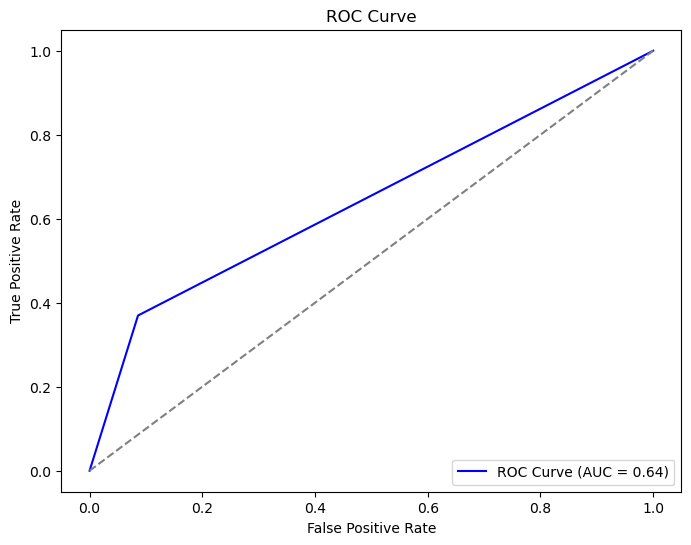

In [50]:
auc = roc_auc_score(y,y_pred)

# Get the ROC curve values
fpr, tpr, thresholds = roc_curve(y,y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [51]:
print(auc)


0.6418231814880149


In [52]:
with open('logistic_regression_model1.pkl', 'wb') as file:
    pickle.dump(model, file)
    

In [53]:
#Precision: Measures the proportion of correctly predicted positive instances out of all predicted positives.
#Precision = True positive/True positive + False positive
#Focuses on minimizing false positives.

In [54]:
#Recall: Measures the proportion of correctly predicted positive instances out of all actual positives.
#Recall = Recall/True Positive + False Negative
#Focuses on minimizing false negatives.